In [ ]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from dotenv import load_dotenv 
import seaborn as sns

load_dotenv() # add t his line
name=os.getenv('NAME_')
name=name.split(",")
#path=[r"C:Blow_nose",r"C:Brush_hair", r"C:Drink_water"]
df = pd.DataFrame()
k = 0
#os.getcwd()


Path es una lista con los nombres de las carpetas con las actividades y debe colocarse el nombre del disco donde se almacena + : + nombre de la actividad. 

Ejemplo: 

path=[r"D:Blow_nose",r"D:Brush_hair", r"D:Brush_teeth", r"Drink_water",r"Dusting",r"Eat_meal",r"Ironing", r"Open_a_bottle", r"Open_a_box",r"Phone_call",r"Put_on_a_jacket",r"Put_on_a_shoe",r"Put_on_glasses",r"Salute",r"Sit_down",r"Sneeze_cough",r"Stand_up",r"Take_off_a_jacket",r"Take_off_a_shoe",r"Take_off_glasses",r"Type_on_a_keyboard",r"Whasing_dishes",r"Whasing_hands",r"Wrinting" ]

In [4]:
path=os.getenv('PATH_')
for p in name:
    os.chdir(path)
    os.chdir(p)
    file_extension = '.csv'
    all_filenames = [i for i in glob.glob(f"*{file_extension}")]
    for f in all_filenames:
        temp = pd.read_csv(f, names=['x', 'y', 'z'])
        temp['sample'] = k
        temp['activity'] = f'{p[2:]}'
        df = df.append([temp], ignore_index=True)
        k = k + 1


C:\Users\Daritza Teheran\AppData\Local\Temp\ipykernel_10008\2239719275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([temp], ignore_index=True)
C:\Users\Daritza Teheran\AppData\Local\Temp\ipykernel_10008\2239719275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([temp], ignore_index=True)
C:\Users\Daritza Teheran\AppData\Local\Temp\ipykernel_10008\2239719275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([temp], ignore_index=True)
C:\Users\Daritza Teheran\AppData\Local\Temp\ipykernel_10008\2239719275.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([temp],

In [6]:
V=[]
for i in range(k):
    sp = df[df['sample']==i]
    sp = sp.drop(['activity'], axis=1)

    #V.append(sp.values)
    
    print(sp.size)

#db = DBSCAN(eps=0.3, min_samples=10).fit(V)

588
496
452
440
452
584
664
600
624
560
368
296
292
348
240
252
288
228
372
336
748
404
412
356
560
536
360
396
372
332
336
228
308
304
268
216
284
228
412
472
388
376
324
520
548
244
336
308
388
400
420
712
844
884
648
292
240
244
292
252
484
524
492
240
480
388
452
280
576
452
484
508
468
652
548
516
252
368
524
480
388
416
416
388
388
124
176
164
212
164
148
124
176
164
164
268
268
268
176
228
304
296
324
248
292
388
452
452
484
572
228
428
404
340
292
588
708
564
508
584
336
440
372
336
456
424
484
468
480
208
216
172
168
208
936
724
564
612
660
236
260
224
328
276
796
880
972
864
1164
424
552
324
436
380
572
660
376
440
372
652
484
548
492
584
656
540
516
572
1048
488
452
420
956
596
272
324
392
400
336
440
296
240
292
304
536
528
448
480
552
536
468
472
508
564
684
588
592
496
444
244
296
316
384
540
188
252
172
172
168
564
608
448
512
540
360
364
268
372
268
396
532
472
420
576
364
284
340
500
556
600
528
480
596
540
584
628
452
372
492
476
676
592
568
844
372
416
440
452
440
29

Azul z
rojo x
verde y

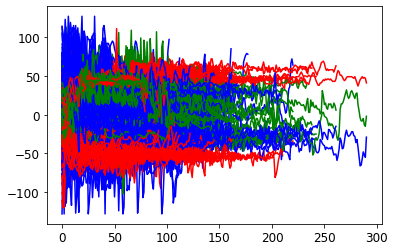

In [7]:
for p in name:
    os.chdir(path)
    os.chdir(p)
    file_extension = '.csv'
    all_filenames = [i for i in glob.glob(f"*{file_extension}")]
    for f in all_filenames:
        #for i in [‘Walking’, ‘Jogging’, ‘Upstairs’, ‘Downstairs’, ‘Sitting’, ‘Standing’]:
        temp = pd.read_csv(f, names=['x', 'y', 'z'])
        #data = temp[['x-axis', 'y-axis', 'z-axis']]
        axis = temp["x"].plot(subplots=True, color="b", fontsize = 12)
        axis = temp["y"].plot(subplots=True, color="r", fontsize = 12)
        axis = temp["z"].plot(subplots=True, color="g", fontsize = 12)
    break

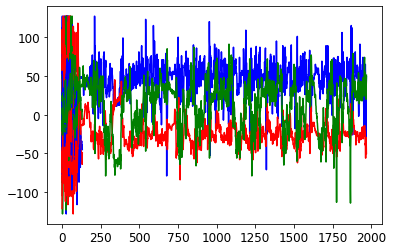

In [8]:
path=os.getenv('PATH_')
def path_(p):
    os.chdir(path)
    os.chdir(p)
    file_extension = '.csv'
    all_filenames = [i for i in glob.glob(f"*{file_extension}")]
    for f in all_filenames:
        temp = pd.read_csv(f, names=['x', 'y', 'z'])
        axis = temp["x"].plot(subplots=True, color="b", fontsize = 12)
        axis = temp["y"].plot(subplots=True, color="r", fontsize = 12)
        axis = temp["z"].plot(subplots=True, color="g", fontsize = 12)
        #axis.set_title(p)


path_('D:Sit_down')
# path_('D:Brush_hair')
# path_('D:Phone_call')
# path_('D:Salute')

X=[(0, 0, 0),(1,1,1)]